In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def solve(a, b, g1, g2, fi, f, n, m):
    vector_x = np.linspace(a, b, n + 1)
    vector_t = np.linspace(0, T, m + 1)
    matrix_u = np.zeros((m + 1, n + 1))

    for i in range(m + 1):
        matrix_u[i][0] = g1(vector_t[i])
        matrix_u[i][n] = g2(vector_t[i])

    for i in range(n + 1):
        matrix_u[0][i] = fi(vector_x[i])
            
    for i in range(1, m + 1):
        for j in range(1, n):
            matrix_u[i][j] = (
                k * tau / (h ** 2) * (matrix_u[i - 1][j + 1] - 2 * matrix_u[i - 1][j] + matrix_u[i - 1][j - 1]) +
                tau * f(vector_x[j], vector_t[i - 1]) + matrix_u[i - 1][j]
            )        
    
    return matrix_u

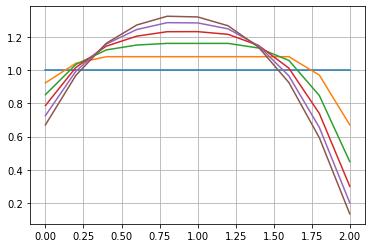

In [5]:
a, b = 0, 2
k = 0.5
T = 0.4

fi = lambda x: 1
g1 = lambda t: math.e ** (-t)
g2 = lambda t: math.e ** (-5 * t)
f = lambda x, t: 1

n = 10
h = (b - a) / n
tau = round(0.5 * (h ** 2) / k, 4)
m = int(T / tau)


vector_x = np.linspace(a, b, n + 1)
vector_t = np.linspace(0, T, m + 1)

matrix_u = solve(a, b, g1, g2, fi, f, n, m)
for i in range(0, len(vector_t), 2):
    plt.plot(vector_x, matrix_u[i])
plt.grid()
plt.show()